# Proyecto 1: ONU ODS

- Juan Camilo Colmenares - 202011866
- Juan Montealegre - 20201723
- David Gonzales - 201815834

El objetivo de este proyecto es pasar 

In [45]:
import numpy as np
import pandas as pd

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import (
    ConfusionMatrixDisplay, RocCurveDisplay,
    roc_auc_score, precision_score, recall_score, f1_score
)
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline

In [46]:
pd.set_option("display.max_colwidth", None)

In [47]:
nltk.download("punkt")
nltk.download("stopwords")
stopwords = stopwords.words("spanish")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\juanm\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\juanm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [48]:
stopwords

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

In [49]:
df = pd.read_excel("data/cat_6716.xlsx")

In [50]:
df.shape

(3000, 2)

In [51]:
df.sample(5)

,Textos_espanol,sdg
2198,"¿Qué se espera que haga un tribunal federal cuando se le pide que haga cumplir un laudo arbitral extranjero? ¿Qué restricciones imponen las Convenciones en el curso normal de su adjudicación? Este artículo examina esta cuestión desde un punto de vista limitado que ha sido problemático para el Segundo Circuito, es decir, lo que queda del poder inherente de un tribunal de derecho consuetudinario para diferir o desestimar el litigio de un caso de la Convención sobre la base de que constituye un "" foro ""inconveniente"".",16
417,"Además, los contaminantes microbianos de las aguas residuales pueden agravar la pérdida de biodiversidad (Comisión Europea, 2013). A pesar de la inversión y el establecimiento de plantas de tratamiento de aguas residuales, muchas naciones desarrolladas siguen sufriendo contaminación microbiana debido a los vertidos de aguas residuales y a la contaminación agrícola difusa, en particular durante los episodios de alta pluviosidad, cuando los desbordamientos combinados de alcantarillado operan con mayor frecuencia y se induce la escorrentía de la agricultura.",6
1316,"Las medidas de eficiencia energética ayudaron a reducir el uso de energía en todo el mundo. Sin la mejora del 13% de la eficiencia energética mundial entre 2000 y 2016, el uso mundial de energía final habría sido un 12% mayor. Mientras que las emisiones de GEI presentan un límite físico global al aumento de la producción con la tecnología y los métodos actuales.",7
325,"En Brasil, por ejemplo, se firman contratos entre la Agencia Nacional del Agua (ANA), los estados y los comités de cuenca (pactos del agua) para posibilitar la implementación conjunta de instrumentos de gestión de los recursos hídricos mediante el establecimiento de metas, actividades y plazos para cada parte. No hay intercambios de recursos financieros entre las partes, siendo cada una responsable de apoyar la implementación de sus actividades en el pacto. Los resultados alcanzados están relacionados con la reducción de los costos de cumplimiento y la adopción de un enfoque integrado para la implementación de instrumentos de gestión de recursos hídricos en esas cuencas.",6
720,"Las calificaciones de riesgo más altas para los riesgos in situ y de desarrollo (respectivamente) se utilizan para producir calificaciones iniciales. El establecimiento de objetivos de seguridad hídrica puede guiarse por varias características económicas (en parte, siguiendo a OCDE, 2008). Sin embargo, la consecución de los objetivos también puede conllevar importantes costes económicos.",6


In [56]:
df["sdg"].value_counts(dropna=False, normalize=True)

6     0.333333
7     0.333333
16    0.333333
Name: sdg, dtype: float64

In [53]:
df["Textos_espanol"]=df["Textos_espanol"].astype(str)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(df[["Textos_espanol"]], df["sdg"], test_size=0.3, stratify=df["sdg"], random_state=1)

In [58]:
X_train.shape, X_test.shape

((2100, 1), (900, 1))

In [59]:
pd.Series(y_train).value_counts(normalize=True)

7     0.333333
6     0.333333
16    0.333333
Name: sdg, dtype: float64

In [60]:
pd.Series(y_test).value_counts(normalize=True)

6     0.333333
7     0.333333
16    0.333333
Name: sdg, dtype: float64

In [61]:
bow = CountVectorizer(tokenizer=word_tokenize, stop_words=stopwords, lowercase=True)

In [63]:
X_bow = bow.fit_transform(X_train["Textos_espanol"])

C:\Users\juanm\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [64]:
print("Vocabulary size:", len(bow.vocabulary_))

Vocabulary size: 18531


## Training a model with BoW

In [65]:
bow_model = RandomForestClassifier(random_state=2)

In [66]:
bow_model.fit(X_bow, y_train)

RandomForestClassifier(random_state=2)

<Axes: >

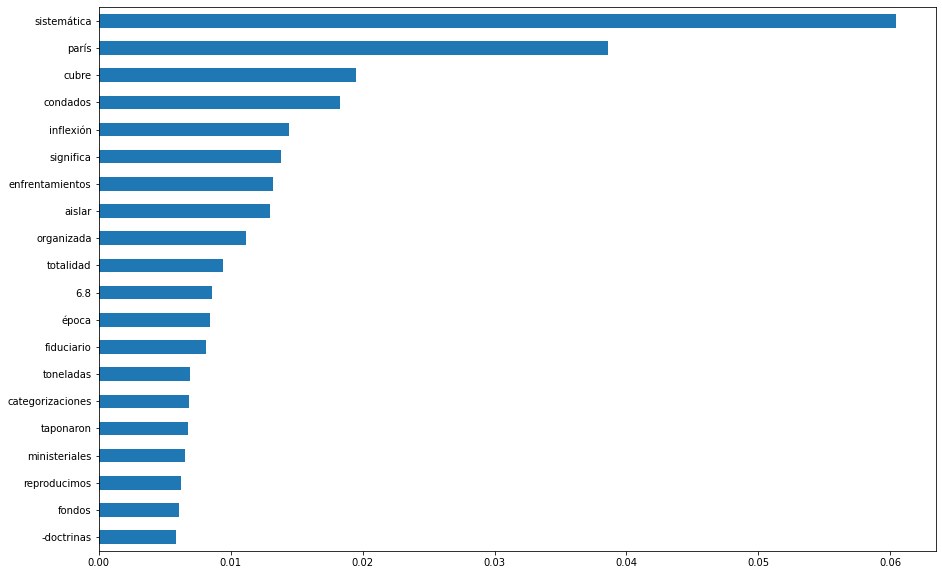

In [67]:
pd.Series(bow_model.feature_importances_, index=bow.vocabulary_).sort_values().tail(20).plot.barh(figsize=(15, 10))

In [68]:
bow_estimators = bow_model.estimators_
print("Number of trees:", len(bow_estimators))
print("Trees depth (mean):", np.mean([tree.get_depth() for tree in bow_estimators]))

Number of trees: 100
Trees depth (mean): 93.13


In [70]:
y_train_bow_predict = bow_model.predict(X_bow)
y_test_bow_predict = bow_model.predict(bow.transform(X_test["Textos_espanol"]))

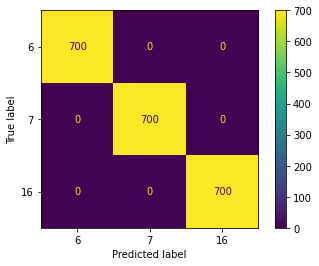

In [71]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_bow_predict)

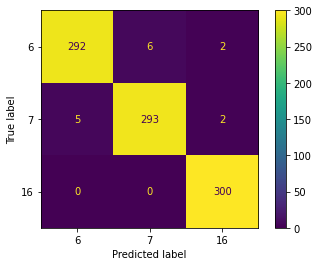

In [72]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_bow_predict)

In [78]:
print("Precision Score : ",precision_score(y_test, y_test_bow_predict, 
                                           pos_label='positive',
                                           average='micro'))
print("Recall Score : ",recall_score(y_test, y_test_bow_predict, 
                                           pos_label='positive',
                                           average='micro'))

Precision Score :  0.9833333333333333
Recall Score :  0.9833333333333333


C:\Users\juanm\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1521: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\juanm\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1521: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
